# Day 24

https://adventofcode.com/2016/day/24

Since I solved Day 18 of AOC 2019 (maze with keys and doors) I know how to tackle this kind of problems. It's a tree navigation I can solve with DFS, but with an additional dimension to be tracked other then the physical coordinate, in this case the series of special locations already visited.

## Part 1

In [2]:
from collections import defaultdict
from queue import Queue

def getStart(amaze,start="0"):
    ys = 0
    xs = -1
    for l in amaze:
        if start in l:
            xs = l.index(start)
        if xs>=0:
            return (xs,ys,'0') 
        ys += 1
        
def getLocations(amaze):
    pos = []
    loc = []
    y = 0
    for l in amaze:
        x = 0
        for c in l:
            if c!='#' and c!='.':
                pos.append(c)
                loc.append((x,y))
            x+=1
        y+=1
    return pos,loc

def getAdjacent(n):
    '''returns list of adiacent cells'''
    x,y = n
    return [(x-1,y), # W
            (x,y-1), # N
            (x+1,y), # E
            (x,y+1)] # S

def searchLocations(amaze):
    start = getStart(amaze)
    loc,_ = getLocations(amaze)
    locs = "".join(sorted(loc)) # storing visited special locations as a string, so that it's hashable
    queue = Queue()
    queue.put([0,start])
    visited = defaultdict(bool) # dictionary of visited location for faster access
    visited[start] = True
    while not queue.empty():
        path = queue.get()
        c = path[1]
        xc,yc,visitedlocs = c
        if visitedlocs == locs: # the first path found is the shortest
            break
        for a in getAdjacent((xc,yc)):
            xa,ya = a
            ak = (xa,ya,visitedlocs)
            if amaze[ya][xa] == '#' or visited[ak]:
                continue
            else:
                new_visitedlocs = visitedlocs
                if amaze[ya][xa]!="." and amaze[ya][xa] not in visitedlocs: # found a new special location
                    new_visitedlocs = "".join(sorted(visitedlocs + amaze[ya][xa]))
                ak = (xa,ya,new_visitedlocs)
                visited[ak] = True
                lenght = path[0]+1
                new_path = [lenght,ak]
                queue.put(new_path)
    return path

In [3]:
maze = [
    '###########',
    '#0.1.....2#',
    '#.#######.#',
    '#4.......3#',
    '###########'
]

path = searchLocations(maze)
print(path[0])

14


In [4]:
with open("data/input24.txt") as f:
    maze = [l.strip("\n") for l in f.readlines()]

path = searchLocations(maze)
print(path[0])

448


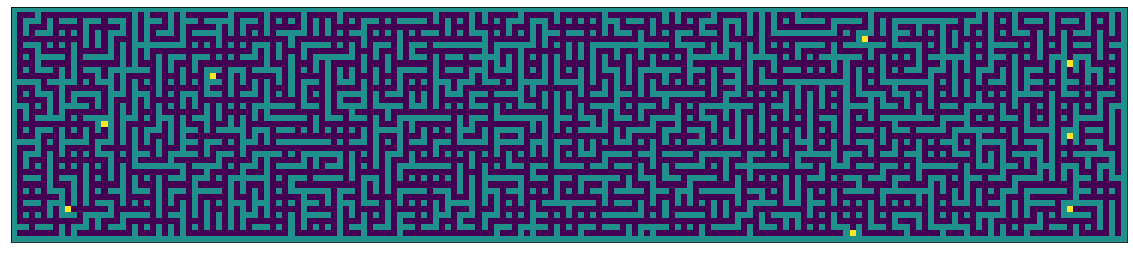

In [5]:
import numpy as np
import matplotlib.pyplot as plt

with open("data/input24.txt") as f:
    maze = [l.strip("\n") for l in f.readlines()]

theMaze = np.zeros((len(maze),len(maze[0])))
      
EMPTY   = 0
WALL    = 1
SPECIAL = 2

y = 0
for r in maze:
    x = 0
    for c in r:
        if c=='#':
            theMaze[y,x] = WALL
        elif c==".":
            theMaze[y,x] = EMPTY
        else:
            theMaze[y,x] = SPECIAL
        x+=1
    y+=1

plt.figure(figsize=(20,20))
f = plt.imshow(theMaze)
f.axes.get_xaxis().set_visible(False)
f.axes.get_yaxis().set_visible(False)

## Part 2

In [30]:
def searchLocationsAndBack(amaze):
    start = getStart(amaze)
    loc,_ = getLocations(amaze)
    locs = "".join(sorted(loc))
    queue = Queue()
    queue.put([0,start])
    visited = defaultdict(bool)
    visited[start] = True
    while not queue.empty():
        path = queue.get()
        c = path[1]
        xc,yc,visitedlocs = c
        if visitedlocs == "".join(sorted(locs))+"0": # the first path found is the shortest
            break
        for a in getAdjacent((xc,yc)):
            xa,ya = a
            ak = (xa,ya,visitedlocs)
            t = amaze[ya][xa]
            if  t == '#' or visited[ak]:
                continue
            else:
                new_visitedlocs = visitedlocs
                if t!=".":
                    if t!="0" and t not in visitedlocs : # found a new special location
                        new_visitedlocs = "".join(sorted(visitedlocs+t))
                    elif t=="0" and len(visitedlocs)==len(locs) : # found all special locations, and finally back again to 0
                        new_visitedlocs = "".join(sorted(visitedlocs))+t
                ak = (xa,ya,new_visitedlocs)
                visited[ak] = True
                lenght = path[0]+1
                new_path = [lenght,ak]
                queue.put(new_path)
    return path

In [31]:
maze = [
    '###########',
    '#0.1.....2#',
    '#.#######.#',
    '#4.......3#',
    '###########'
]

path = searchLocationsAndBack(maze)
print(path[0])

20


In [32]:
with open("data/input24.txt") as f:
    maze = [l.strip("\n") for l in f.readlines()]

path = searchLocationsAndBack(maze)
print(path[0])

672
